## Homework 4

Use this notebook as a starter

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [77]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

Some of the features are encoded as numbers. Use the following code to de-code them:

In [78]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [79]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [80]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [81]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

What are the categorical variables? What are the numerical?

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  4454 non-null   int64 
 1   home       4454 non-null   object
 2   time       4454 non-null   int64 
 3   age        4454 non-null   int64 
 4   marital    4454 non-null   object
 5   records    4454 non-null   object
 6   job        4454 non-null   object
 7   expenses   4454 non-null   int64 
 8   income     4454 non-null   int64 
 9   assets     4454 non-null   int64 
 10  debt       4454 non-null   int64 
 11  amount     4454 non-null   int64 
 12  price      4454 non-null   int64 
 13  default    4454 non-null   int32 
dtypes: int32(1), int64(9), object(4)
memory usage: 469.9+ KB


In [83]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [84]:
categorical = ["home","marital","records","job"]
numerical = ["seniority","time","age","expenses","income","assets","debt","amount","price"]

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [87]:
len(df_full_train), len(df_test)

(3563, 891)

In [88]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [89]:
len(df_train), len(df_val)

(2672, 891)

In [90]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [91]:
y_train = df_train.default
y_val = df_val.default
y_test = df_test.default

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [92]:
from sklearn.metrics import roc_auc_score

In [93]:
for f in numerical:
    print(f,roc_auc_score(df_train["default"],df_train[f]))

seniority 0.2906221375508058
time 0.5608662489595051
age 0.4267066727500061
expenses 0.4990815782782989
income 0.31799333386736695
assets 0.35139574328771983
debt 0.49521703242164505
amount 0.5910773431595518
price 0.5043329862114843


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [94]:
df_train = df_train[['seniority', 'income', 'assets', 'records', 'job', 'home']]
df_val = df_val[['seniority', 'income', 'assets', 'records', 'job', 'home']]
df_test = df_test[['seniority', 'income', 'assets', 'records', 'job', 'home']]

In [95]:
from sklearn.feature_extraction import DictVectorizer

In [96]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [99]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [100]:
y_pred = model.predict_proba(X_val)[:,1]

In [101]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [102]:
auc(fpr, tpr).round(3)

0.812

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [103]:
from sklearn.metrics import precision_score,recall_score

In [104]:
precision_scores = []
recall_scores = []
thresholds = np.arange(0, 1, 0.01)
for t in thresholds:
    
    y_val_preds = []
    
    for prob in y_pred:
        if prob > t:
            y_val_preds.append(1)
        else:
            y_val_preds.append(0)
            
    precision = precision_score(y_val, y_val_preds, zero_division=1)
    recall = recall_score(y_val, y_val_preds, zero_division=1)
    precision_scores.append(precision)
    recall_scores.append(recall)

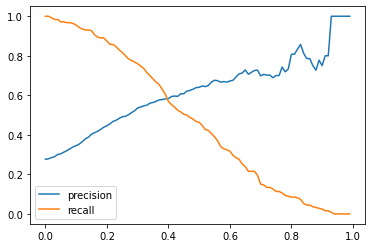

In [105]:
plt.plot(thresholds, precision_scores, label='precision')
plt.plot(thresholds, recall_scores, label='recall')
plt.legend()
plt.show()

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [106]:
f1_score = []
for t in thresholds:
    
    y_val_preds = []
    
    for prob in y_pred:
        if prob > t:
            y_val_preds.append(1)
        else:
            y_val_preds.append(0)
            
    precision = precision_score(y_val, y_val_preds, zero_division=1)
    recall = recall_score(y_val, y_val_preds, zero_division=1)
    f1 = 2*((precision*recall)/(precision+recall))
    f1_score.append(f1)
    #print("t:{},f1:{}".format(t,f1))
print(f1_score[::10])

[0.43271767810026385, 0.5075593952483801, 0.5906593406593407, 0.6285714285714286, 0.5761316872427984, 0.5377358490566039, 0.430939226519337, 0.24749163879598665, 0.15441176470588236, 0.04724409448818898]


At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [107]:
from sklearn.model_selection import KFold

In [108]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [109]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [110]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.default.values
    y_val = df_val.default.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    print(auc.round(3))
    scores.append(auc.round(3))

print('std: %.3f' % (np.std(scores)))

0.854
0.864
0.83
0.856
0.818
std: 0.017


How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [111]:
from tqdm.auto import tqdm

In [112]:
n_splits = 5

for C in tqdm([0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc.round(3))

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.844 +- 0.017
C=0.1 0.844 +- 0.017
C=1 0.844 +- 0.017
C=10 0.844 +- 0.017


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C